<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_5_SVM_with_All_Kernel_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  1.Load Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 2.Read Data

In [4]:
bankdata = pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Ganpat-University-Data-Science/main/bill_authentication.csv")
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### 3.Exploration Data Analysis

In [6]:
bankdata.shape

(1372, 5)

In [7]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


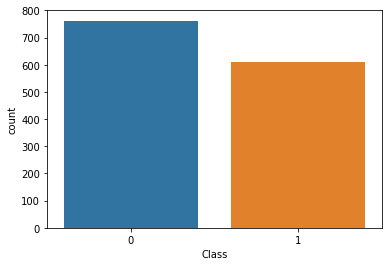

In [22]:
sns.countplot(x=bankdata["Class"])
plt.show()

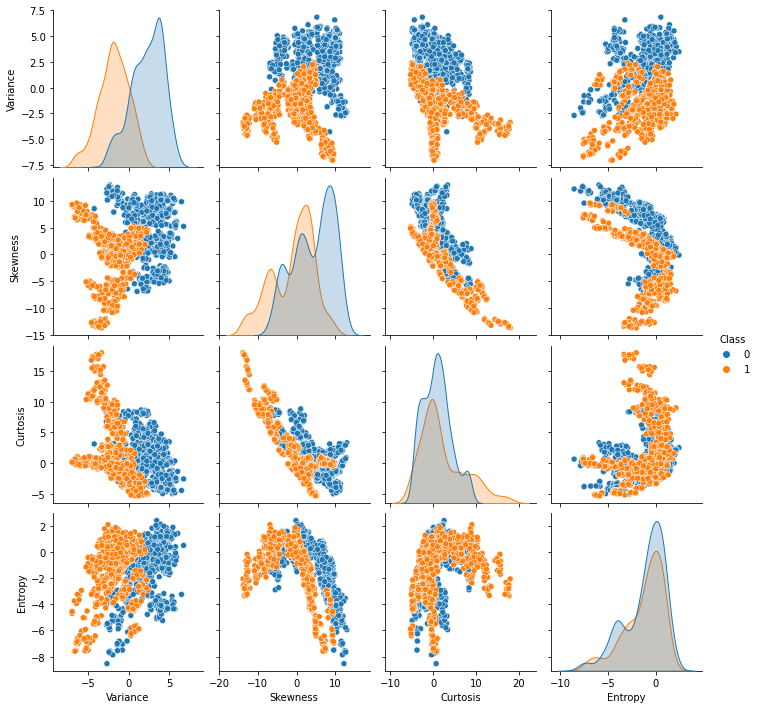

In [23]:
sns.pairplot(bankdata, hue="Class")
plt.show()

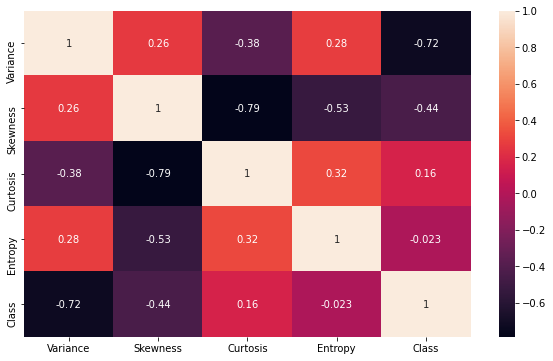

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(bankdata.corr(), annot=True)
plt.show()

**From Above Diagram we can see their is a multicolliniraty between curtosis and skewness but can be ignored**

In [16]:
columns = list(bankdata.columns)
columns.remove('Class')

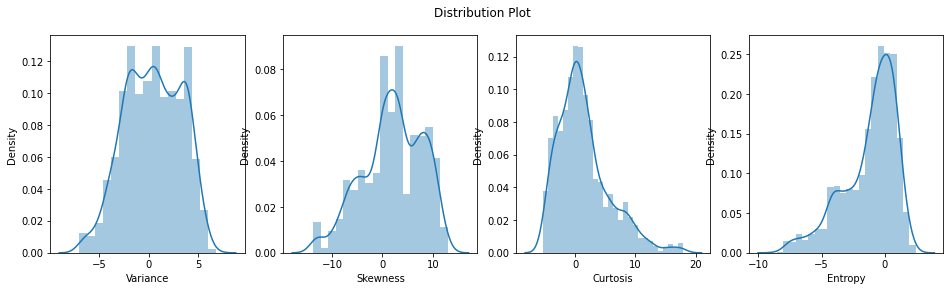

In [28]:
fig, ax = plt.subplots(ncols = 4, figsize=(16, 4))
fig.suptitle("Distribution Plot")

for index, column in enumerate(columns):
    sns.distplot(bankdata[column], ax=ax[index])

plt.show()

* Their may be outliers in entropy and curtosis column
* Data is not normalized

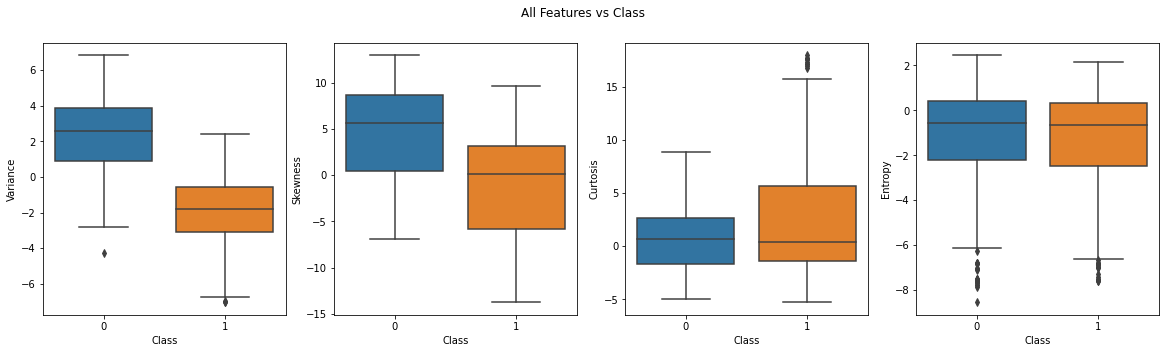

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle("All Features vs Class")

for index, column in enumerate(columns):
    sns.boxplot(x="Class", y=column, data=bankdata, ax=ax[index])

plt.show()

### 4.Data preparation

In [31]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

### 5.Split Data into train-test-split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [34]:
[i.shape for i in [X_train, y_train, X_test, y_test]]

[(1097, 4), (1097,), (275, 4), (275,)]

### 6.Apply SVM with Different Kernel Methods

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,  cohen_kappa_score, accuracy_score

In [64]:
def result_analysis(y_test, y_pred):
  print("Classification Report : \n",classification_report(y_test, y_pred))
  print("-"*20)
  print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
  print("Cohen Kappa :", cohen_kappa_score(y_test, y_pred))
  print("-"*20)
  cm = confusion_matrix(y_test, y_pred, normalize="true")
  print(cm)
  sns.heatmap(cm, annot = True)
  plt.xlabel("Predict")
  plt.xlabel("True")
  plt.title("Confusion Matrix")
  plt.show()

### 7.Apply different Kernel method and see the result

In [65]:
kernel_methods = ['linear', 'poly', 'rbf', 'sigmoid']

******************linear SVM Analysis******************
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       154
           1       0.98      0.98      0.98       121

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

--------------------
Accuracy : 98.54545454545455
Cohen Kappa : 0.9704840613931524
--------------------
[[0.98701299 0.01298701]
 [0.01652893 0.98347107]]


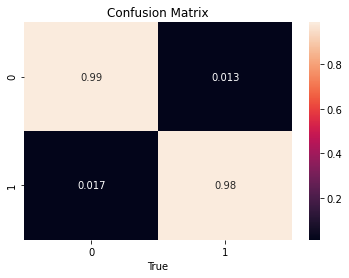

******************linear SVM End******************
******************poly SVM Analysis******************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       154
           1       0.93      1.00      0.96       121

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275

--------------------
Accuracy : 96.72727272727273
Cohen Kappa : 0.9341142020497804
--------------------
[[0.94155844 0.05844156]
 [0.         1.        ]]


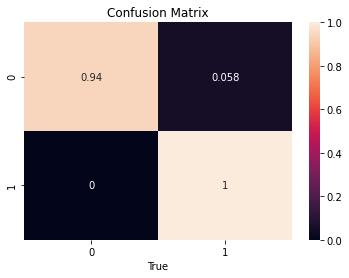

******************poly SVM End******************
******************rbf SVM Analysis******************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       154
           1       0.98      1.00      0.99       121

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

--------------------
Accuracy : 99.27272727272727
Cohen Kappa : 0.985268120212139
--------------------
[[0.98701299 0.01298701]
 [0.         1.        ]]


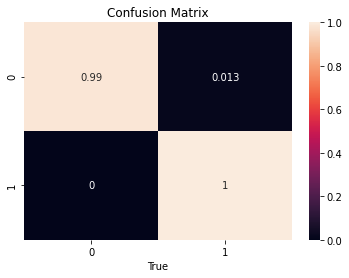

******************rbf SVM End******************
******************sigmoid SVM Analysis******************
Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       154
           1       0.64      0.72      0.67       121

    accuracy                           0.69       275
   macro avg       0.69      0.70      0.69       275
weighted avg       0.70      0.69      0.70       275

--------------------
Accuracy : 69.45454545454545
Cohen Kappa : 0.3888242142025611
--------------------
[[0.67532468 0.32467532]
 [0.28099174 0.71900826]]


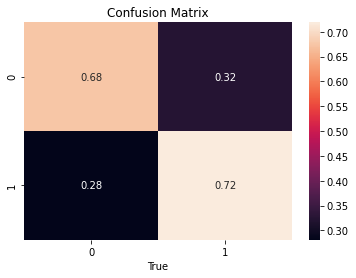

******************sigmoid SVM End******************


In [69]:
accuracy = []
algo = []
for kernel in kernel_methods:
  model = SVC(kernel=kernel)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = model.score(X_test, y_test)
  accuracy.append(acc)
  algo.append(kernel)
  print(f"******************{kernel} SVM Analysis******************")
  result_analysis(y_test, y_pred)
  print(f"******************{kernel} SVM End******************")

### 9.SVM Different algotihm Result Accuracy Comparisionn

In [74]:
df = pd.DataFrame()
df["Algorithm"] = algo
df["Accuracy"] = accuracy

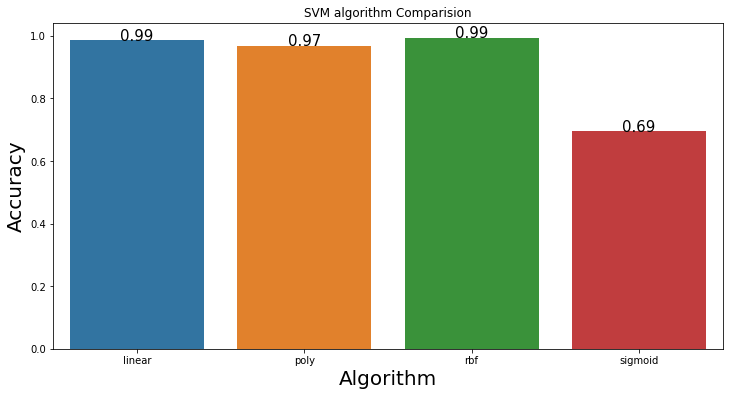

In [81]:
# Defining the plot size
plt.figure(figsize=(12, 6))

# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Algorithm", y="Accuracy", data=df)

# Iterrating over the bars one-by-one
for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 5),
				textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Algorithm", fontsize=20)

# Setting the label for y-axis
plt.ylabel("Accuracy", fontsize=20)

# Setting the title for the graph
plt.title("SVM algorithm Comparision")

# Fianlly showing the plot
plt.show()